In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# NOTE! There are missing imports here, you will have to add to the imports as you go. 
# I suggest you add all your imports at the top of the notebook. (in this cell)

# California Housing with Linear Regression

In this notebook we will work with a [California Housing Prices Data](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). 
We are going to use the [Scikit-Learn api](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) to automatically get it. 

In [2]:
housing = fetch_california_housing(as_frame=True) # as_frame will return pandas dataframes instead of numpy arrays

In [3]:
# Scikit-learn datasets normally have a .DESCR attribute, which will tell you about the dataset.
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# it's always a good idea to check the type of your variables (especially if you just loaded them automatically)
type(housing)

sklearn.utils._bunch.Bunch

The datatype `bunch` is used by sklearn to contain their datasets. The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html). It's easiest to think of it as a dictionary which contains different elements of the dataset. So the most basic operation you will want to do is to print the `.keys()` in order to see what elements are available for access.

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
housing.target  #Each value corresponds to the average house value in units of 100,000. If as_frame is True, target is a pandas object.

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [8]:
# set X to be the data. X is uppercase because it represents a matrix
# since we used as_frame=True, housing.data is a pandas dataframe
X = housing.data
# set y to be the target labels. y is lowercase because it represents a vector.
# since we used as_frame=True, housing.target is a pandas series
y = housing.target

# Explore the data

The first step of any machine learning project is to explore the data a little bit. We already have a general idea because of the description given to us, but let's dig in a tiny bit more.

In [9]:
# printing the shape of your X matrix is always a good idea.
X.shape

(20640, 8)

We have 20640 samples (housing records) and 8 columns (features).

In [10]:
y.shape

(20640,)

These are the 20640 "labels" or put another way "thing we are interested in predicting".  In this case they are median housing prices, that is the price that the house sold for. From the documentation "The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000)."

Let's put our data into a dataframe with pandas and examine the first 5 rows of each.

In [11]:
# looking at the feature names from the dataframe
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
y.head()


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Ok, so we have glanced over the first 5 rows just to get a "feel" for the data, do we notice anything interesting? Well we see that the range of the values for each column is quite different, we need to deal with that. So we can add scaling our data to a list of things to do.  Before we run off and start scaling though, let's perform some basic exploratory data analysis. Our goal here is to visually and statisically examine the dataset and see what pops out at us. 

I think the very first step is to just look at the basic information of the data.


# Checking the general information


In [21]:
X.info() # this is a simple function that will get us some basic info about our dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


The `.info()` function will tell us a lot about our dataframe. We can see the RangeIndex, which basically tells us how many values are in the dataframe, further it will tell us what the datatype of the index is (if it's a datetime index for example). In this case we have a basic index, with 20640 rows. 

Next you can see the names of all the columns, and what `Dtype` they are. The datatype in pandas dataframes are heterogeneous, that means you can have different datatypes for different columns. This is just like your standard database - for the same performance reasons. Note that a numpy array _cannot_ have different datatypes for the different columns, this is a bonus feature that pandas gives us building on top of arrays.

Note that `.info()` gives us a non-null count for each column. I find this helpful when scanning for missing values, but I don't only rely on it.
Then we can also see the memory usage for our dataframe, this can be very helpful when you aren't sure what is hogging all the ram!

## Looking for missing values

In [13]:
# This is one of many ways to check if there are any missing values in the dataset.
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Using `.isnull().sum()` is one of many ways to check for missing values. I like it because it will show me the missing values column-wise, however if you have a lot of columns this will be truncated and you will have to do other ways. Note you can add an extra `.sum()` and get a single value of `na`'s.

## Looking deeper with EDA (exploratory data analysis)
Ok, now we have look at 
The kinds of questions we want to be thinking about are:
  *  Are any columns strongly correlated?
  *  Do there appear to be columns that have wide ranges and potential outliers?
  *  If we can understand the features, look for relationships that make logical sense (e.g., price of house vs size of house)

We will look at raw numbers and visualizations now. Raw numbers will generally be summary statistics like the mean, standard deviation, max, min, etc. Visualizations will be things like pairplots, correlation matrices, etc.

### `pandas.DataFrame.describe()`

This function is very useful to get some quick intuitions for the dataset that you are working with.  Describe will give you thec ommon statistics of your matrix, the mean, std (standard deviation), min, max, and quantiles.  It's nice to scroll through and see if anything interesting pops out.  Looking through the output below, do you notice anything interesting?

In [23]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# Plot the histograms

Plot histograms for all the continous variables in the dataframe. Use the `.hist()` dataframe method.
You should experiment with the bin size. Use the `bins=` keyword parameter to try different amounts of bins.


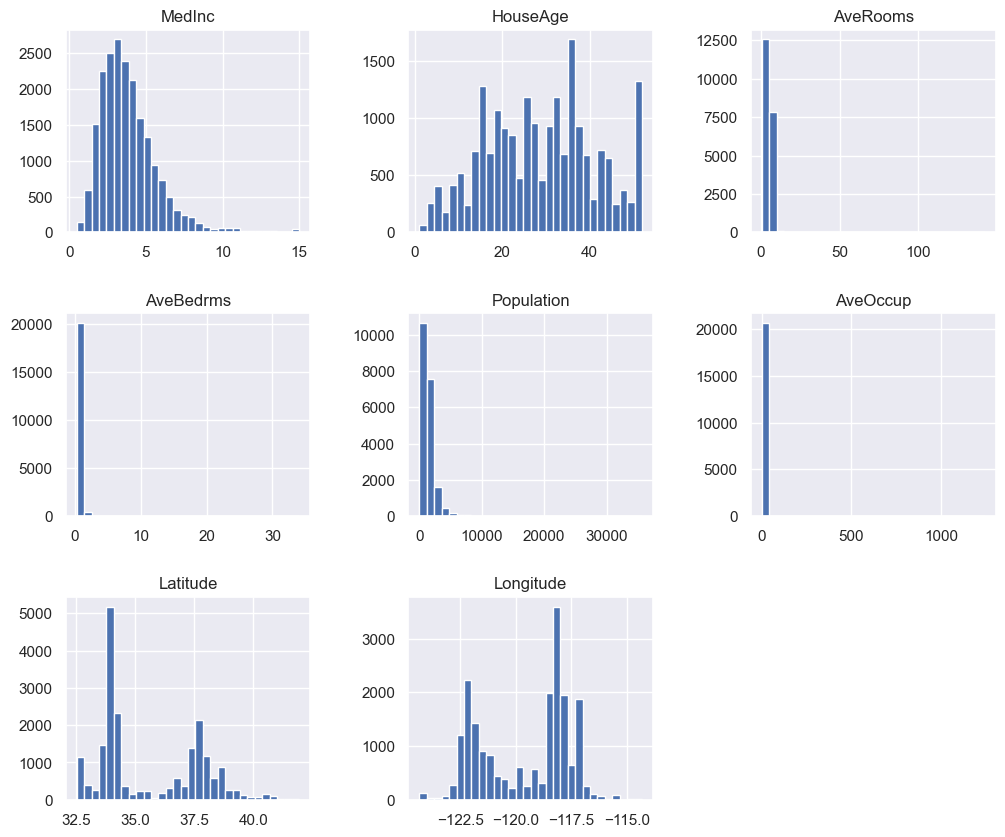

In [14]:
X.hist(figsize=(12, 10), bins=30)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

### Plot the histograms for the columns that seem only have one value.

Note that some of the histograms seems to only have one column. That is because they are skewed, they have a lot of small values off to the right, they are so small you cannot see them. However, we can zoom in to see the skew.


(0.0, 199.0)

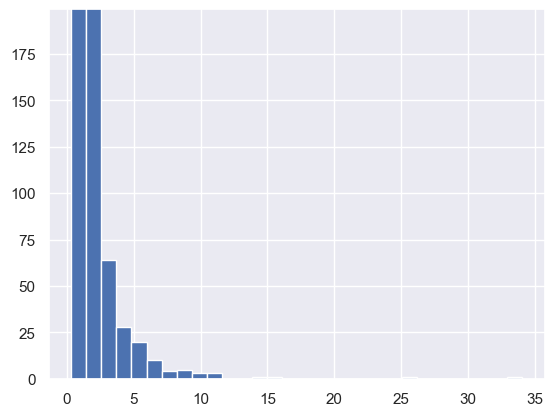

In [15]:

# in order to limit the y-axis we need to expose the axes element
# To get the axes, we will generate one with the subplots command.
fig, ax = plt.subplots()

# select only the column you are interested in from X
# note that we pass ax to the ax keyword. If you don't pass one, pandas will generate it's own.
X['AveBedrms'].hist(bins=30, ax=ax)
# now you can set the y_lim on the axes. 
# play with the top value to zoom in farther and farther
ax.set_ylim(bottom=0, top=199)



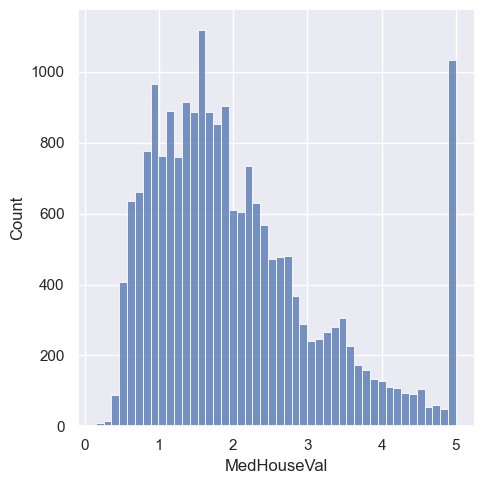

In [16]:
# we should also plot the histogram of the target variable!
sns.displot(y)

## What is that strange single bar above the 5?

When we look at the distribution of the target variable the value at the right side for 500,000$ it`s` too high, maybe they should have included higher options like up to 1,000,000$ on their scale

# Plotting the longitude and Latitude

We will create a scatter plot counting the longitude and latitude of the data, while coloring the datapoints according to the gradient of colors.
Let`s see ` if we can find any pattern based on location

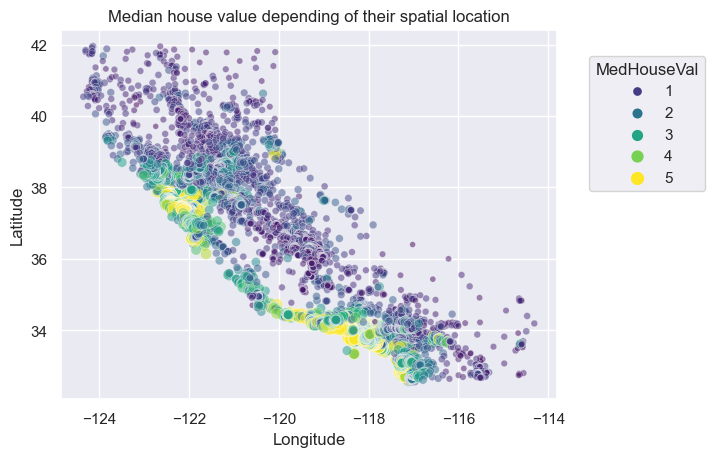

In [17]:
import seaborn as sns

sns.scatterplot(data=X, x="Longitude", y="Latitude",
                size=y, hue=y,
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
plt.title("Median house value depending of their spatial location");

# It looks like a plot of California

Seems that the yellow spots (the most expensive) are the San Francisco bay area and the Los Angeles area. seems that this daa is a bit old, from before the Silicon Valley boom. So today I bet this map would be quite different.
The small cluster of yellow that is in the upper right seems to be lake Tahoe, a popular ski resort and beautiful area.

# Pairwise plot
Next we will create what is known as a "pairwise" plot. The idea here is that we want to look at how the features are related to each other. Basically we want to see if they are correlated, if when one feature increases the other feature either goes up or down significantly. So we will do a grid plot where each feature will be compared with every other feature. 

The diagonal axis will produce histograms of the feature (basically the same thing we did early) because we are looking at how the feature interacts with itself.

Using seaborn we can do an extra trick though - we can colorize the plots so that the hue (color pattern) corresponds to our target variable (the price of the house). This is really neat because we can not only see how the features interact with each other, but we get a _third_ dimension which is the target variable. So we in fact are seeing how each feature interacts with the target variable at the same time.


In [18]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = X.drop(columns=columns_drop)
subset["MedHouseVal"]= y

# Quantize the target and keep the midpoint for each interval
# the reason we are doing this is because it makes the plotting readable. 
# it will essentially smooth the data, and squish down any wild outliers that cause the axis of the plots to be hard to read.
# if you are curious you can comment out these lines and see the difference.
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

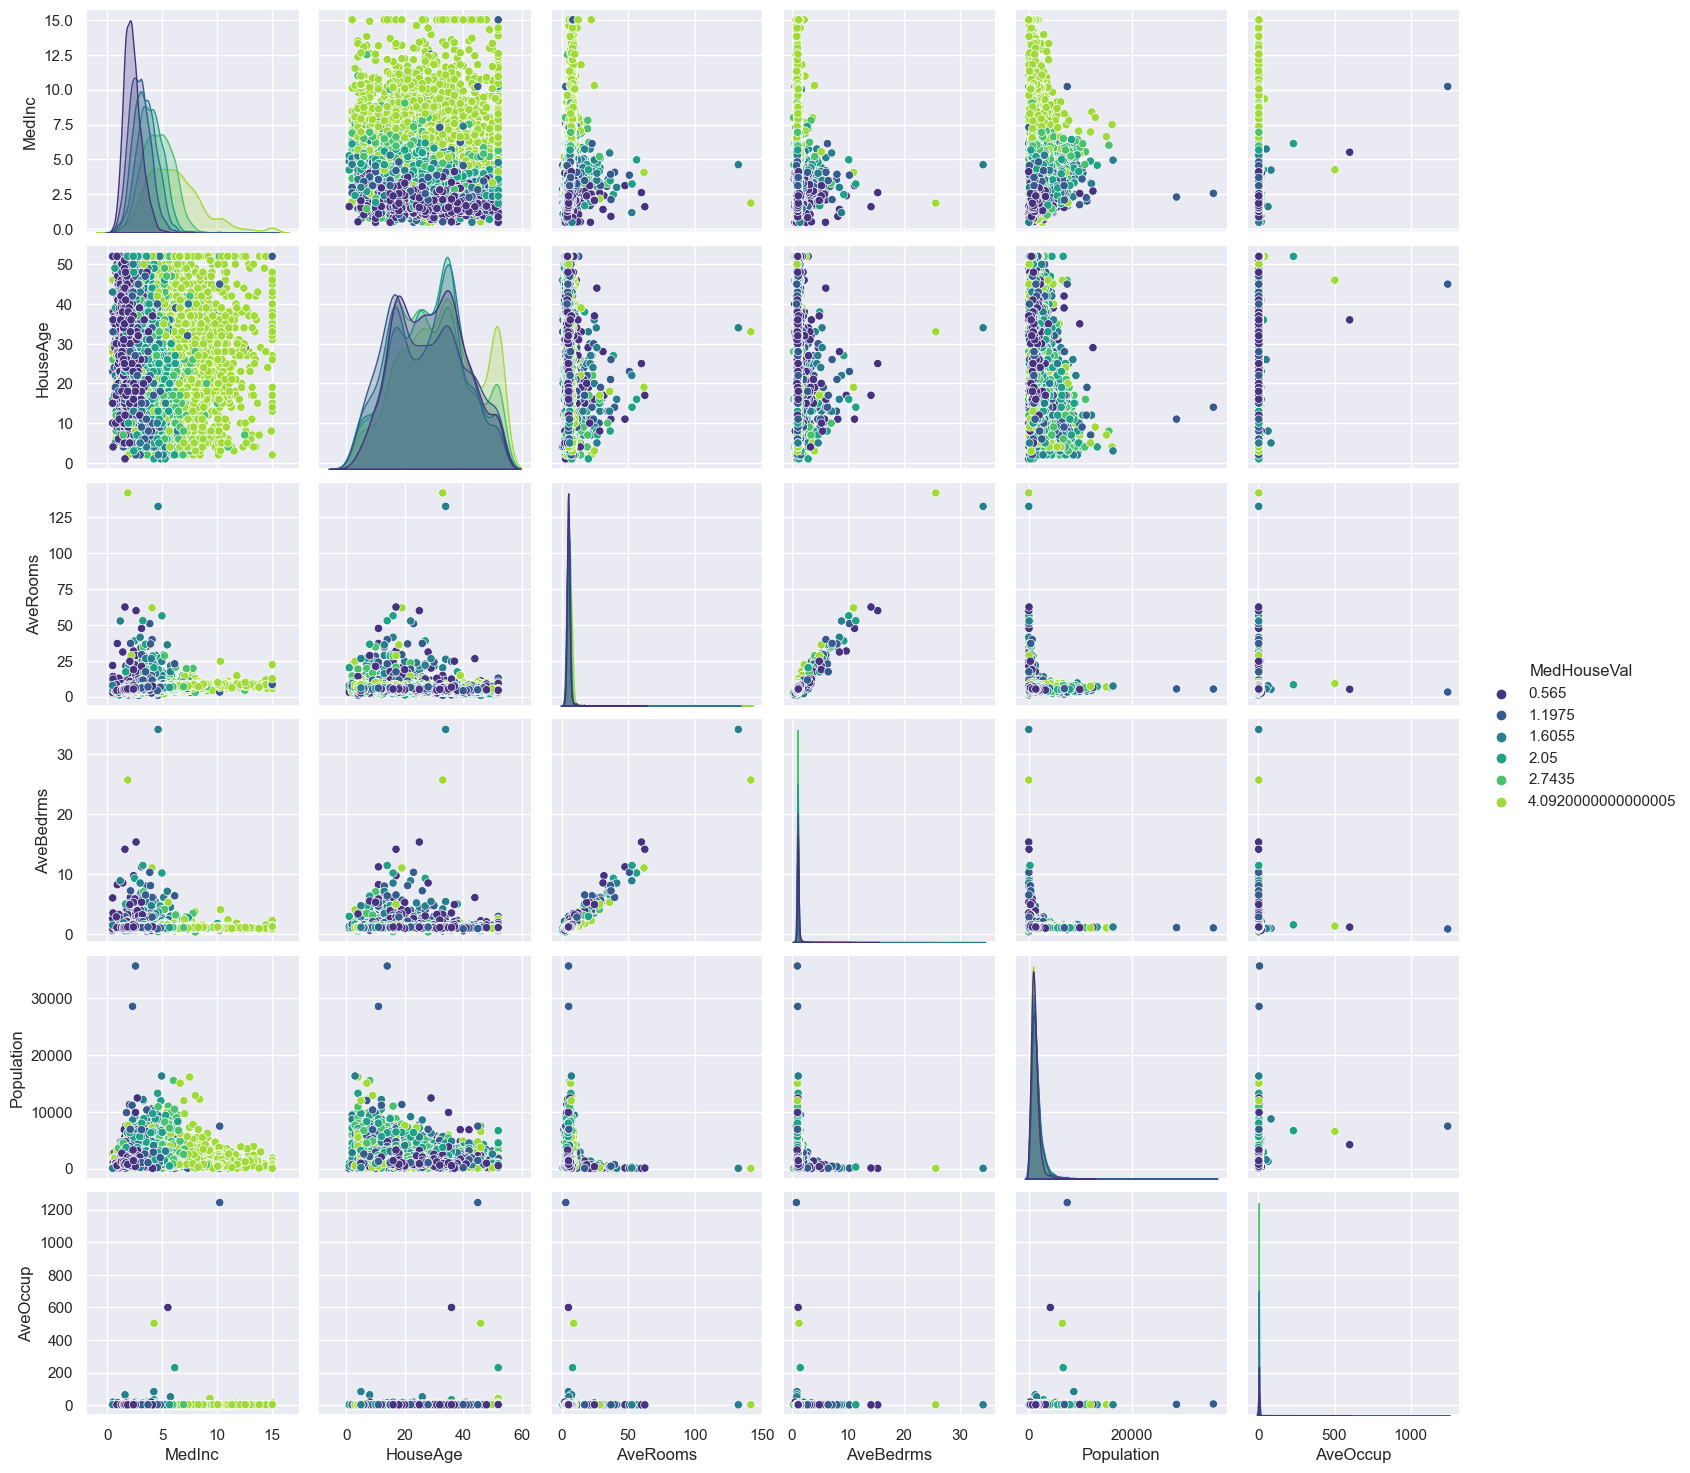

In [19]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")



## Scikit-Learn API 

Many (most?) objects in scikit-learn have a `.fit` method which will tell the model to do whatever it was designed to learn.  From the objects that have a `.fit` method, you will get either a follow up `.transform` or `.predict` method.  Objects with `.transform` are transfromers (like the scaler we just used), their job is to learn some statistics from the data and transform it according to some logic (using the statistics that were learned).  Objects that have a `.predict` method are machine learning algorithms, and when you call `.fit` on them they are going to learn whatever rules / functions that the algorithm is designed to learn. When you call `.predict` with them, they will take as input a data point(s) and give you a prediction(s) for the input.

So, in summary we frequently see three methods

* `.fit` : this tells the object to learn
* `.transform` : this tells the object to apply it's learning in the form a transformation to the input. This method _returns_ an object (the transformed data
* `.predict` : this tells the object to make a prediction on the input, using whatever function the model learned (from the `.fit` call it made earlier)

## Scaling our dataset

Ok, we need to scale our dataset.  We learned about two choices so you can pick from two options!

* StandardScaler
* MinMaxScaler

The order of operations goes like this:
1. initialize a scaler
2. call `fit` on our dataset
3. transform our dataset and return that value to a new variable.

Note: `.fit` and `.transform` are called seperately for some sneaky tricky reasons we will get into a bit later. For now just think to yourself about _why_ sklearn _might_ have seperate `.fit` and `.transform` functions on it's scalers.

In [20]:
## initialize a scaler here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# your choice of scaler here (check the imports to remember their names)

In [23]:
## fit your scaler here -- fitting happens "in place" which means it doesn't return anything
scaler.fit(X)           #Calculates the mean and standard deviation

scaler.mean_

array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
        1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02])

In [24]:
## transform our dataset now and return the value
X_transformed=scaler.transform(X)
type(X_transformed)


numpy.ndarray

In [25]:
X_transformed_df=pd.DataFrame(X_transformed, columns=housing.feature_names)
X_transformed_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


# Train a model

Ok it's time to train our model.  We will want to choose one of the three options we imported earlier.

* LinearRegression
* SGDRegressor
* Ridge


In [26]:
# initialize a model here
from sklearn.linear_model import Ridge

reg=Ridge(random_state=2023)

In [27]:
# Train your model here with .fit
reg.fit(X_transformed,y)

Ridge(random_state=2023)

In [28]:
reg.intercept_

2.0685581690891386

In [29]:
# you can take a look at the coefficients your model learned with model.coef_ and model.intercept_
reg.coef_

for coef, name in zip(reg.coef_,X.columns):
    print (f"The {name} column has {coef:.3f} importance")

The MedInc column has 0.830 importance
The HouseAge column has 0.119 importance
The AveRooms column has -0.265 importance
The AveBedrms column has 0.306 importance
The Population column has -0.004 importance
The AveOccup column has -0.039 importance
The Latitude column has -0.899 importance
The Longitude column has -0.870 importance


## umm... are we done?
So we fit a model right? Now unlike our previous work, we can't really plot this model, it's not a line in 2d, it's a plane in 13d.  So what can we do?  We need to evaluate our model somehow! What should we do?
How about we make a bunch of predictions and see what kind of accuracy it gets?  We can evaluate it's mean-squared error, the same metric we used to optimize it.

# Evaluate our model

Ok, let's use our trained model to make predictions, then we can evaluate those predictions against the real known `y` values. You will need to use your models `.predict()` function which needs some input to predict on.

In [30]:
## use your model to make predictions on the data

y_pred=reg.predict(X_transformed)
y_pred[:5]
y[:5]
y.describe()        #Standarda deviation

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

Ok now we need to evaluate our predictions. We will use scikit-learns inbuilt mean squared error metric for this. It's very important that you pass your arguments correctly to the evaluation function, all scikit-learn metrics use `y_true, y_pred` format, which means pass the ground-truth first, followed by the prediction.


In [31]:
# now you need to evaluate your model.
# you can use the mean squared error and the r2 score to do this.
# you can import these from sklearn.metrics
# remember that you need both predictions and ground truth to evaluate your model.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"The MSE is {mse:.3f}")
print(f"The R2 score is {r2:.3f}")



The MSE is 0.524
The R2 score is 0.606


y.describe()

np.sqrt(0.524)

### Automate model production
Let's build more models and automate the evaluation with a for loop.

In [32]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

reg_ridge = Ridge(random_state=2023)
reg_SGD = SGDRegressor(random_state=2023)
reg_Linear = LinearRegression()

In [33]:
# put them in a list and loop over them
regs= [reg_ridge, reg_SGD, reg_Linear]

In [34]:
# Write some code that will take your list and then iterate over each model

for reg in regs:
    reg.fit(X_transformed,y)
    y_pred=reg.predict(X_transformed)
    mse=mean_squared_error(y,y_pred)
    r2=r2_score(y,y_pred)
    class_name={reg.__class__}
    print(f"The MSE is {mse:.3f} for {class_name}")
    print(f"The R2 is {r2:.3f} for {class_name}")


The MSE is 0.524 for {<class 'sklearn.linear_model._ridge.Ridge'>}
The R2 is 0.606 for {<class 'sklearn.linear_model._ridge.Ridge'>}
The MSE is 1344.149 for {<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>}
The R2 is -1008.462 for {<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>}
The MSE is 0.524 for {<class 'sklearn.linear_model._base.LinearRegression'>}
The R2 is 0.606 for {<class 'sklearn.linear_model._base.LinearRegression'>}


# Are we happy with this score?
The R2 ranges between 0-1 , 1 being very correlated (and good in our case). 
For the MSE, it's instructive to look at the square root, which will be the real average error.

In [35]:
np.sqrt(0.5243210444129816 ) 


0.724100161865043

Obviously this is not a good result.

We just trained the model with all the data available we didn`t split it `.

The error its to big. This model its not good.